# Honey Production in the US 

### Analysing the factors which influence honey production in the United States based on data from 1995 to 2021

![Image of honeybee](https://img.freepik.com/free-vector/honey-watercolor-set-with-jar-dipper-bees-honeycomb-house-bucket_1268-13755.jpg)

### Step 1: import the modules required for data analysis and dataset

In [707]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import rankdata
from scipy.stats import spearmanr

In [723]:
#read in dataset
data = pd.read_csv("US_honey_dataset.csv")

### Step 2: Investigate the dataset

In [724]:
#check the formatting of the dataset
data.head() 

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


### The factors in this dataset include:
- **Unnamed: 0**: index number
- **state**: The state in the US within which the honey is produced
- **colonies_number**: The maximum number of honey-producing colonies
- **yield_per_colony**: The honey yield from each colony in lbs
- **production**: The total honey production (calculated by colonies_number * yield_per_colony)
- **stocks**: The honey stocks held by producers in lbs
- **average_price**: The average price per lb based on expanded sales in US dollars
- **value_of_production**: The value of honey production (calculated by production * average price) in US dollars
- **Year**: The year data was tabulated

column 1 is unecessary as python provides an internal index numbering option so we can remove "unnamed" column 

In [725]:
#remove column 1
del data["Unnamed: 0"] 

In [726]:
#gives a summary of the data's descriptive statistics
data.describe() 

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
count,1115.000000,1115.000000,1.115000e+03,1.115000e+03,1115.000000,1.115000e+03,1115.000000
mean,62438.565022,59.743498,2.851268e+06,1.172625e+06,140.623076,5.667412e+06,2007.740807
std,92648.175955,19.940500,5.561202e+06,2.049556e+06,107.011544,9.459460e+06,7.823002
min,2000.000000,19.000000,1.200000e+04,9.000000e+03,1.300000,1.060000e+05,1995.000000
25%,9000.000000,45.000000,2.460000e+05,1.125000e+05,70.000000,1.008000e+06,2001.000000
50%,26000.000000,57.000000,8.280000e+05,3.700000e+05,128.000000,2.281000e+06,2008.000000
75%,69000.000000,71.000000,2.700000e+06,1.253500e+06,193.000000,5.704000e+06,2015.000000
max,550000.000000,155.000000,3.906000e+07,1.354500e+07,874.000000,8.385900e+07,2021.000000


In [727]:
#check for null values which may interfere with data analysis
data.isnull().sum() 

state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

There are no null values in this dataset!

In [728]:
# row number of producer of the greatest amount of honey in one year across all years
index_of_max_produce = data["production"].idxmax() 
# all information about this producer
data.loc[index_of_max_produce] 

state                  California
colonies_number            420000
yield_per_colony               93
production               39060000
stocks                    4687000
average_price                60.0
value_of_production      23436000
year                         1995
Name: 3, dtype: object

The state of California produced the greatest amount of honey (39,060,000 lbs) in 1995 than any other state in the measured time.

In [729]:
#filter data by selecting only values from 2021
max = data[(data["year"] == 2021)]

#greatest honey production across 2021
max["production"].max() 

#getting info on the largest producer of honey in 2021
index_of_max_current = max["production"].idxmax() 
data.loc[index_of_max_current]

state                  SouthDakota
colonies_number             250000
yield_per_colony                49
production                 5268000
stocks                     5268000
average_price                 2.27
value_of_production       27808000
year                          2021
Name: 1105, dtype: object

The most recent producer of the greatest amount of honey was South Dakota in 2021, producing 5,268,000 lbs of honey in 2021, earning approximately $27,808,000 that year

### Step 3: Investigating trends in US honey production

#### Production values were grouped by state and changes in production were measured over time 

In [730]:
#grouping data by state for analysis
state_group = data.groupby(["state"], as_index=False) 

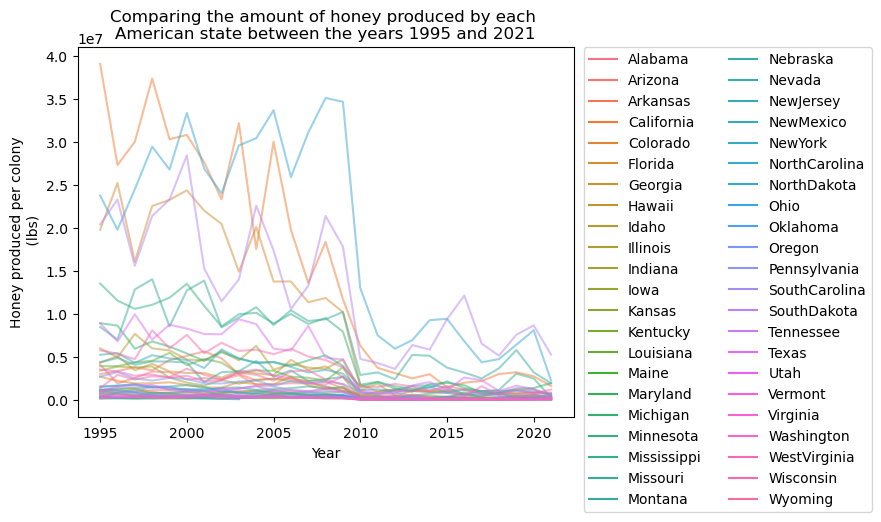

In [731]:
#plot production against year in lineplot and add both graph and axes titles
fig_1 = sns.lineplot(data=data, x="year", y="production", hue = "state", alpha = 0.5).set(title="Comparing the amount of honey produced by each \nAmerican state between the years 1995 and 2021",xlabel = "Year", ylabel = "Honey produced per colony\n (lbs)") 

#format the legend, moving it to outside of the graph and sorting into two columns for improved legibility 
plt.legend(bbox_to_anchor=(1.02,1),loc = "upper left",  borderaxespad=0,ncol=2) 

There seems to have been a substantial drop in honey production across all states in 2010, perhaps due to an change in environment or beekeeping regulations etc.

This lineplot isn't optimal for comparison of all states due to the extensive range of production values and the large number of states

### Step 4: Rank the datapoints for comparable scale

In [732]:
#capitalise state names
data["state"] = data["state"].str.upper()

In [733]:
#ranking states by their production values
data["rank"] = data.groupby("year")["production"].transform(lambda x: rankdata(-x)) 

#sorting values by state and year
data = data.sort_values(["state","year"]) 
#visual data check
data 

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,rank
0,ALABAMA,16000,58,928000,28000,62.00,575000,1995,30.0
44,ALABAMA,16000,64,1024000,102000,86.00,881000,1996,29.0
88,ALABAMA,14000,66,924000,92000,81.00,748000,1997,29.0
131,ALABAMA,16000,71,1136000,159000,72.00,818000,1998,27.0
174,ALABAMA,17000,68,1156000,185000,56.00,647000,1999,27.0
...,...,...,...,...,...,...,...,...,...
954,WYOMING,39000,53,186000,186000,161.00,3328000,2017,22.0
994,WYOMING,39000,56,175000,175000,1.91,4171000,2018,21.0
1034,WYOMING,39000,56,306000,306000,1.43,3123000,2019,20.0
1074,WYOMING,38000,40,608000,608000,1.71,2599000,2020,15.0


In [738]:
#creating an array of the unique state values
STATES = data["state"].unique()
STATE = STATES[0]

A function was created to visualise data about the rankings of honey production on the graphs

In [ ]:
#this function will add a label to the first and last datapoints on each subplot to display their change in ranking over time
def add_label(x, y, fontsize, ax):
    PAD = 0.4
    ax.annotate(
        f"#{int(y)} in\n{str(int(x))[2:]}s", 
        xy=(x, y - PAD), 
        ha="center", 
        va="bottom",
        fontsize=fontsize,
        zorder=12
    )

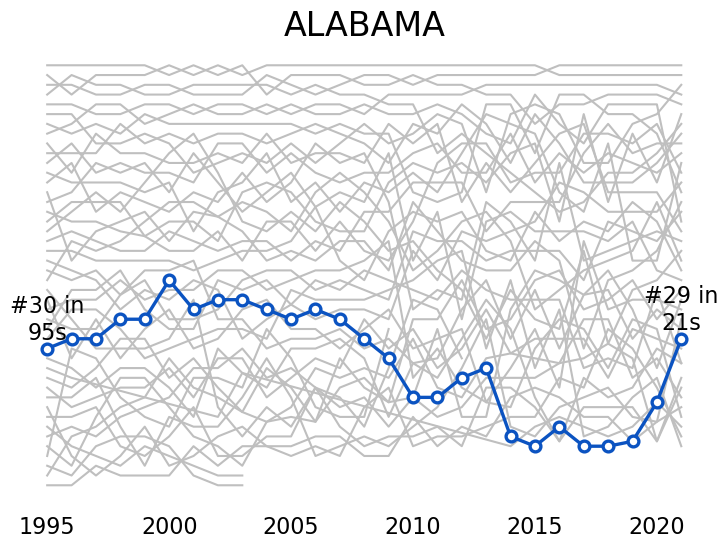

In [742]:
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(9, 6))

# Invert the vertical axis 
ax.invert_yaxis()

# Loop through states
for state in STATES:
    # Filter data to keep rows of the state
    d = data[data["state"] == state] 
    x = d["year"].values
    y = d["rank"].values
    
    # If the state is the selected state, use a thicker blue line and a dot with border
    if state == STATE:
        ax.plot(x, y, color="#0b53c1", lw=2.4, zorder=10)
        ax.scatter(x, y, fc="w", ec="#0b53c1", s=60, lw=2.4, zorder=12)   
        
         # Pass the first and last values to the add_label function
        add_label(x[0], y[0], 16, ax)
        add_label(x[-1], y[-1], 16,ax)
   # If not, use a gray and thinner line
    else:
        ax.plot(x, y, color="#BFBFBF", lw=1.5)
        

# Remove vertical ticks
ax.set_yticks([])

# Set location of horizontal ticks
ax.set_xticks([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

# Set labels for horizontal ticks
ax.set_xticklabels(
    ["1995", " ", " ", " ", " ", "2000", " ", " ", " ", " ", "2005", " ", " ", " ", " ", "2010", " ", " ", " ", " ", "2015", " ", " ", " ", " ", "2020", " "],
    fontsize=16
)
# Remove tick marks in bottom horizontal axis
ax.tick_params(bottom=False)

# Remove the frame
ax.set_frame_on(False)

# Add a title
ax.set_title(STATE, fontsize=24, fontweight=50);

This is a demonstration using the first state in the dataset to create a lineplot with all datapoints whilst highlighting a singles state's information.

This would be useful information to have for all states.

### Step 5: Creating a multi panel plot of ranked production

In [744]:
# apply the above logic to a new function
def plot_state(state, data, annotate, ax):
    
    for state_inner in STATES:
        d = data[data["state"] == state_inner]
        x = d["year"].values
        y = d["rank"].values
        
        if state_inner == state:
            ax.plot(x, y, color = "#0b53c1", lw=1.4, zorder=10)
            ax.scatter(x, y, fc="w", ec="#0b53c1", s=6, lw=1.4, zorder=12)
            add_label(x[0], y[0], 10, ax)
            add_label(x[-1], y[-1], 10, ax)
        else:
            ax.plot(x, y, color="#BFBFBF", lw=1.5)
            
    ax.set_yticks([])
    ax.set_xticks([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
    ax.set_xticklabels(
        [" ", " ", " ", " ", " ", "2000", " ", " ", " ", " ", " ", " ", " ", " ", " ", "2010", " ", " ", " ", " ", " ", " ", " ", " ", " ", "2020", " "], 
        fontsize=10)
    ax.set_title(state, fontsize=10, fontweight=500)
    
    return ax

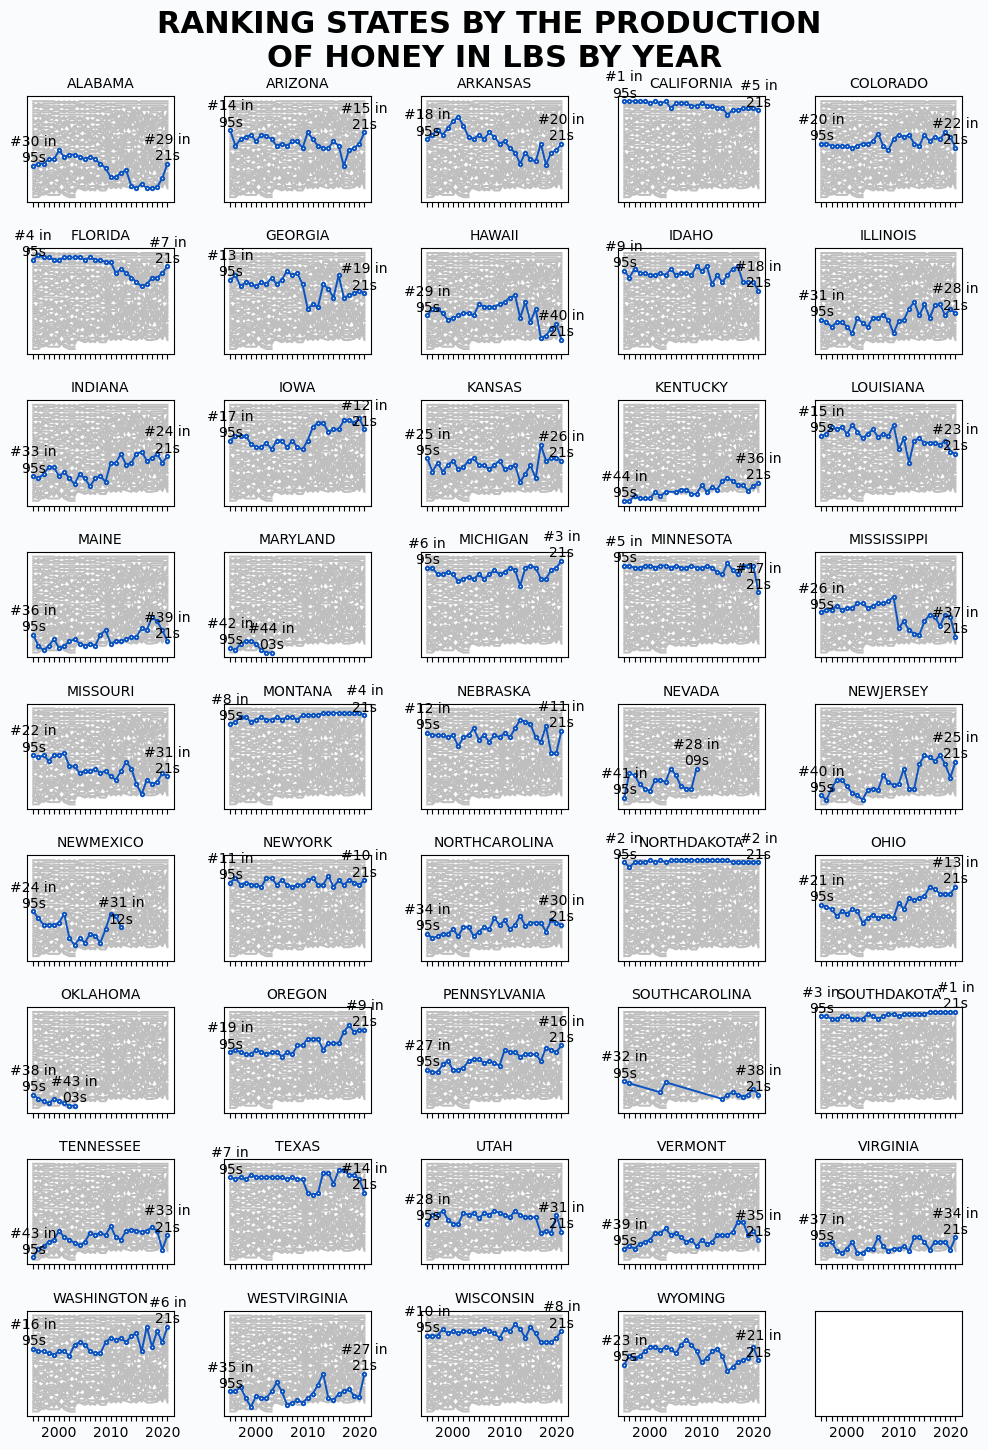

In [746]:
# loop the above function through the entire dataset, adding a new panel for each iteration step
fig, axes = plt.subplots(9,5, sharex=True, sharey=True, figsize=(10,14))
for idx, (ax, state) in enumerate(zip(axes.ravel(), STATES)):
    annotate = idx == 0
    plot_state(state, data, annotate, ax)
    
#since sharey = True, all vertical axis are inverted when inverting it into one subplot
ax.invert_yaxis()


# Add and format title.
fig.text(
    x=0.5, 
    y=1.01,
    s="RANKING STATES BY THE PRODUCTION \nOF HONEY IN LBS BY YEAR",
    ha="center",
    va="center",
    ma="center",
    fontsize=22,
    fontweight="bold"
)

# Set background color
fig.set_facecolor("#f9fbfc")
# Clean up margins, padding and whitespace around the subplots
fig.tight_layout()


Upon visual inspection there seems to be a lot of variation in each states rank overtime, however the oldest and the most recent values generally seem to be fairly similar. It may be interesting to quantify this.

Additionally, some states actually stop producing honey:
Maryland - 2003
Nevada - 2009
New Mexico - 2012
Oklahoma - 2003

### Step 6: Quantifying rank change over time

In [854]:
#calculate the mean, minimum and maximum ranks for each state
rank_mean = pd.DataFrame(data.groupby("state").agg({"rank": ["mean", "min", "max"]}))

In [786]:
# calculate the range of ranks over time within each state
rank_range = rank_mean[("rank", "max")] - rank_mean[("rank","min")]
print("The state with the greatest change in ranking is", rank_range.idxmax(), "which moved by", rank_range.max(), "ranks over 26 years.")

The state with the greatest change in ranking is ARKANSAS which moved by 21.5 ranks over 26 years.


In [858]:
# calculate the mean number of ranks the states drop or rise over time
print("On average states which move around", round(rank_range.mean(),0), "places in production of honey over this time.")

On average states which move around 12.0 places in production of honey over this time.


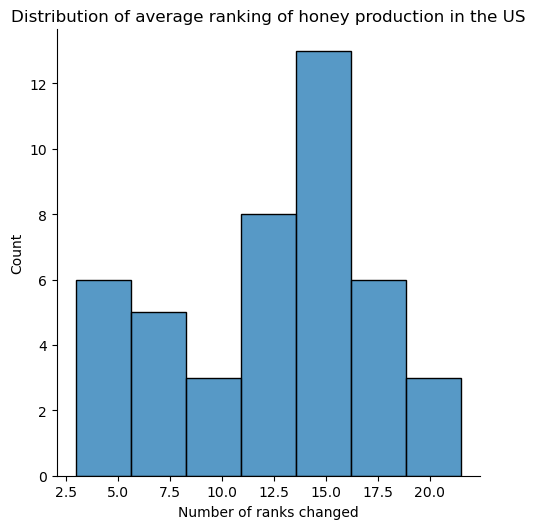

In [831]:
sns.displot(rank_range,).set(title = "Distribution of average ranking of honey production in the US", xlabel = "Number of ranks changed")

The change in rank position across the years does not follow a normal distribution 

### Step 7: Investigate the relationship between amount produced and value of production 

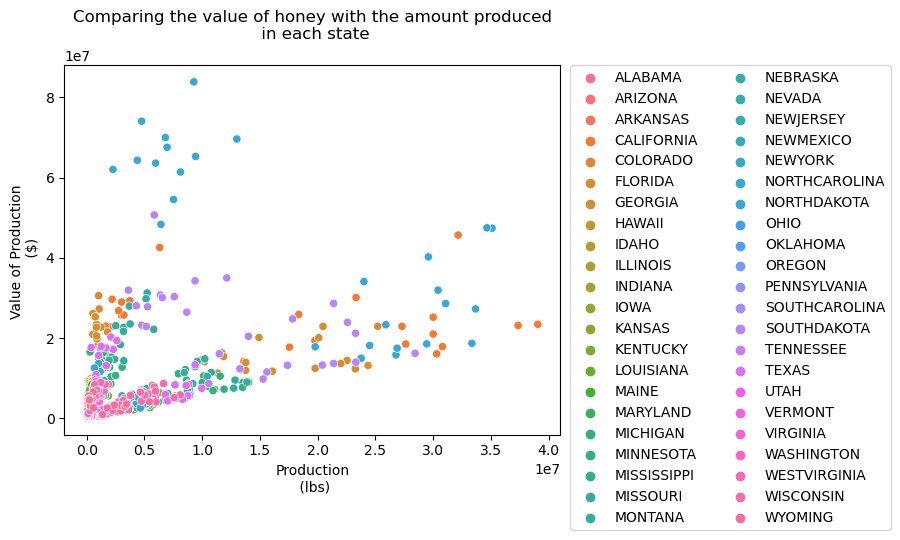

In [838]:
# create a scatterplot of value of production against production amount comparing between states
sns.scatterplot(x="production", y="value_of_production", data=data, hue = "state").set(title = "Comparing the value of honey with the amount produced\n in each state\n", xlabel = "Production\n (lbs)", ylabel = "Value of Production \n ($)") 

#format the legend
plt.legend(bbox_to_anchor=(1.02,1),loc = "upper left",  borderaxespad=0,ncol=2)

Visualising the relationship between production and value of production interestingly shows us that there are two patterns to investigate; one with a steep gradient and one with a flatter gradient, both positive. It would be interesting to group the states by location to see if these patterns could be regionally specific.

### Step 8: Group each datapoint by their general geographical region

In [446]:
#make a dictionary defining the regions of america each state belongs to 
regions = {"NORTHEAST": ["CONNECTICUT",  "MAINE", "MASSACHUSETTS",  "NEWHAMPSHIRE", "NEWJERSEY", "NEWYORK", "PENNSYLVANIA", "RHODEISLAND", "VERMONT"],"SOUTH": ["DELAWARE", "FLORIDA", "GEORGIA", "MARYLAND", "NORTHCAROLINA", "SOUTHCAROLINA", "VIRGINIA", "WASHINGTOND.C.", "WESTVIRGINIA", "ALABAMA", "KENTUCKY", "MISSISSIPPI", "TENNESSEE", "ARKANSAS", "LOUISIANA", "OKLAHOMA", "TEXAS"],"WEST" : ["ARIZONA", "COLORADO", "IDAHO", "MONTANA", "NEVADA", "NEWMEXICO", "UTAH", "WYOMING", "ALASKA", "CALIFORNIA", "HAWAII", "OREGON", "WASHINGTON"], "MIDWEST" : ["ILLINOIS", "INDIANA", "IOWA", "KANSAS", "MICHIGAN", "MINNESOTA", "MISSOURI", "NEBRASKA", "NORTHDAKOTA", "OHIO", "SOUTHDAKOTA", "WISCONSIN"]}    

In [575]:
# create a function to invert the dictionary 
inv_regions = {value: key for key in regions for value in regions[key]} 

In [859]:
# invert the dictionary and map onto new column in data
data["regions"] = data["state"].map(inv_regions)

[Text(0.5, 1.0, 'Comparing the regional value of honey with the amount produced\n'),
 Text(0.5, 0, 'Honey Production\n (lbs)'),
 Text(0, 0.5, 'Average price of honey\n($/lbs)')]

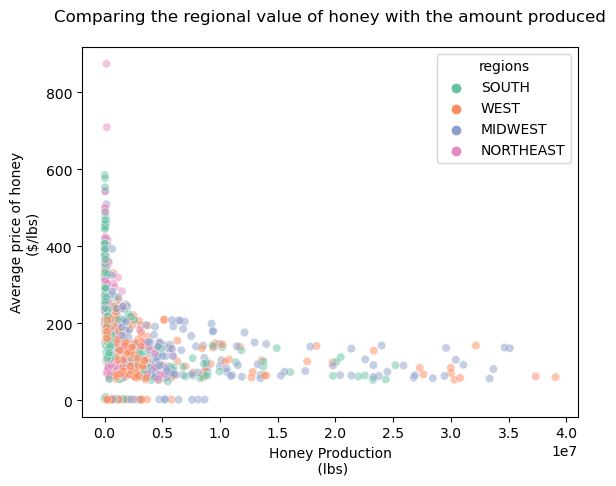

In [856]:
# create a scatterplot showing the previous relationship grouped by region rather than states
fig_2 = sns.scatterplot(x="production", y="average_price", data=data, hue = "regions", alpha=0.5, palette="Set2").set(title = "Comparing the regional value of honey with the amount produced\n", xlabel = "Honey Production\n (lbs)", ylabel ="Average price of honey\n($/lbs)")
fig_2

In [798]:
#check for null values which may interfere with data analysis
data.isnull().sum() 

state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
rank                   0
regions                0
dtype: int64

<bound method Figure.show of <Figure size 1200x600 with 2 Axes>>

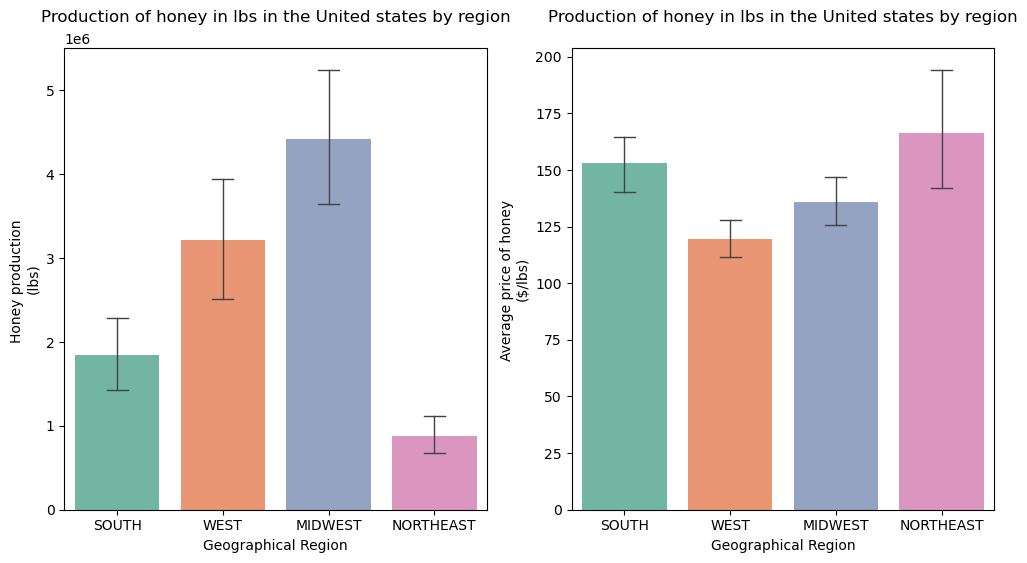

In [814]:
# create a multiplot of bar charts comparing the regional differences mean production of honey and mean honey price
fig, (ax1, ax2) = plt.subplots(figsize=(12,6), ncols=2, sharex=False, sharey=False)
sns.barplot(data= data, x= "regions", y="production", palette="Set2", errwidth = 1, capsize=0.2,ax=ax1).set(title = "Production of honey in lbs in the United states by region\n", xlabel="Geographical Region", ylabel="Honey production \n(lbs)")
sns.barplot(data= data, x= "regions", y="average_price", palette="Set2", errwidth = 1, capsize=0.2, ax=ax2).set(title = "Production of honey in lbs in the United states by region\n", xlabel = "Geographical Region", ylabel="Average price of honey \n($/lbs)")
fig.show

No overlap in error bars of graph (a) implies that significantly less honey is produced in the south and northeast regions of America

However almost the opposite pattern is seen in the value of honey within each region with the northeast and south regions pricing honey much higher, indicating that lower supply is influencing the demand and consequently driving the price up 

## Step 9: Monitoring the influence of colony number

In [827]:
# create a subset of the dataset, to determine the mean number of successful colonies per year within each region of the US
reg_col =  pd.DataFrame(data.groupby(["regions","year"]).agg({"colonies_number": ["mean", "min", "max"]}))

# resets the index to ensure each row has a "region" value
reg = reg_col.reset_index()

In [828]:
# create a new dataframe containing the year, regions and average colony number
reg_new = pd.DataFrame()
reg_new["regions"] = reg["regions"]
reg_new["year"] = reg["year"]
reg_new["ave_colonies"] = round(reg[("colonies_number","mean")],0)
reg_new = reg_new.fillna(0)

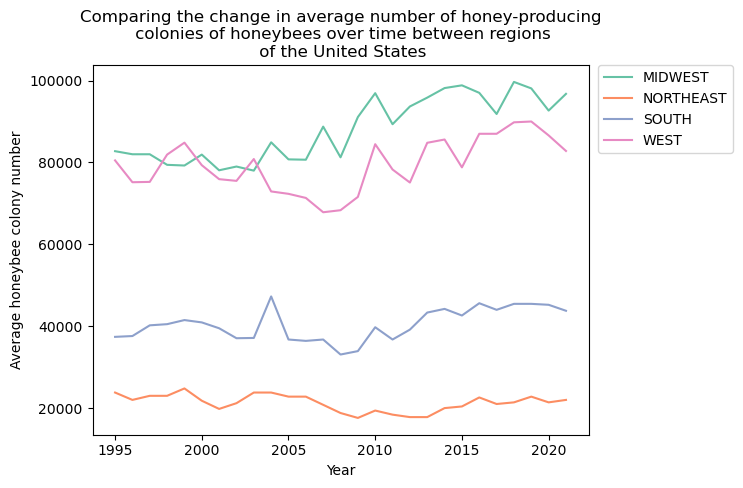

In [857]:
# create a lineplot to visualise the change in mean colony number over time grouped by US region
sns.lineplot(data=reg_new, x="year", y="ave_colonies", hue = "regions", palette="Set2").set(title="Comparing the change in average number of honey-producing\n colonies of honeybees over time between regions\n of the United States",xlabel = "Year", ylabel = "Average honeybee colony number") #adding titles to graph and both axis
plt.legend(bbox_to_anchor=(1.02,1),loc = "upper left",  borderaxespad=0) # formatting legend to outside of graph for legibility and sorting into two columns

From this we can see that the number of colonies is on average showing a gradual **increase** over time thus the aforementioned drop in honey production is not due to fewer colonies or bees but may be due to a further confounding variable 

Interesting future research into this dataset may include combining it with data on the average annual temperature changes to see if there may be an environmental influence contributing to the reduced honey production 

[Text(0.5, 1.0, '\nThe relationship between price of honey with the\n number of successful colonies'),
 Text(0.5, 0, 'Number of honey-producing colonies'),
 Text(0, 0.5, 'Average price of honey\n($/lbs)')]

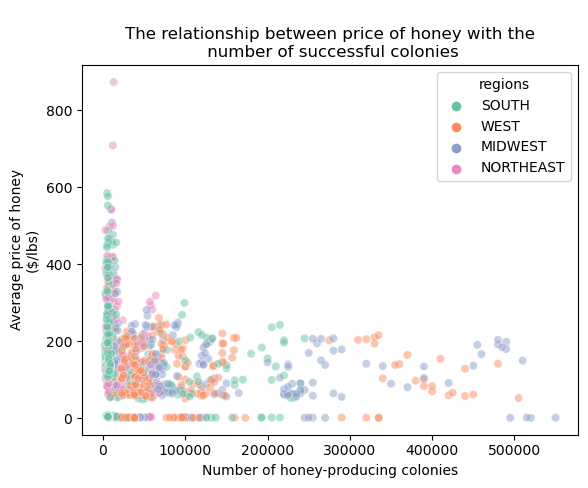

In [853]:
sns.scatterplot(x="colonies_number", y="average_price", data=data, hue = "regions", alpha=0.5, palette="Set2").set(title = "\nThe relationship between price of honey with the\n number of successful colonies", xlabel = "Number of honey-producing colonies", ylabel ="Average price of honey\n($/lbs)")


In [850]:
spearmanr(data["colonies_number"],data["average_price"])

SpearmanrResult(correlation=-0.2685412794709592, pvalue=7.167324038130658e-20)

[Text(0.5, 1.0, 'Regional honey yield per colony over time'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Average yield per colony\n (lbs)')]

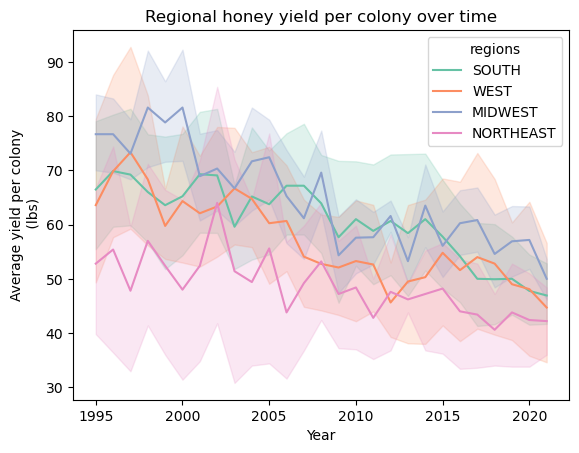

In [873]:
sns.lineplot(x="year", y="yield_per_colony", data=data, hue = "regions", palette="Set2").set(title = "Regional honey yield per colony over time", xlabel = "Year", ylabel ="Average yield per colony\n (lbs)")


In [869]:
spearmanr(data["year"],data["yield_per_colony"])

SpearmanrResult(correlation=-0.3465599260108496, pvalue=8.167906755503169e-33)

There is a strong negative correlation (R2 = -0.35, p <0.05) between time and average yield per colony.

### Conclusions

The Spearman's R test shows a weak but signficant (-0.27, p<.05) negative correlation between average price of honey ($/lb) and the number of colonies successfully producing honey

Furthermore, visual inspection of the regions shows that there are fewer colonies in Northeast America and accordingly the honey is priced higher. A similar conclusion can be drawn for honey from the South but to a lesser extent.

The diminishing honey production observed over time seems to be linked to reduced yield per colony rather than reductions in the number of colonies. Consequently this presents a problem separate to the worldwide decline in entomofauna.

#### Future research 

It would be interesting to investigate population density (city vs rural), environment (temperature, humidity), disease occurrance, breeding practices and use of pesticides to expand upon the conclusions drawn from the current dataset. 

Additionally further research to understand the sudden drop across all states in honey production from 2009 to 2010 could give invaluable insight into optimising future production and yield.

![Image of honeybee with thumbs up](https://charatoon.com/photo/1303.png)